# Bike Sharing Assignment
---

## Building and Testing a Multiple Linear Regression Model
#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing covid lockdown comes to an end, and the economy restores to a healthy state.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* 
How well those variables describe the bike demand


**Input Data** - Based on various meteorological surveys and people's styles, we are proided a large dataset on daily bike demands across the American market based on some factors.



---

## Step 1: Reading and Understanding Data

In [1120]:
# Importing all the libraries used throughout the assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [1121]:
# reading data from the data set and creating a new data frame
bike_df = pd.read_csv("data_set.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1122]:
bike_df.shape # 730 rows and 16 columns

(730, 16)

In [1123]:
bike_df.info() # no columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1124]:
# checking values of all numeric variables
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


---

## Step 2: Data Preparation
In this step I'll be performing activities listed below:

* Identifying and dropping features which are clearly not contributing to prediction of dependent variable values.
* Identifying and Creating dummy features out of features with lables which don't have any order.

#### Identifying and dropping features which are clearly not contributing to prediction of dependent variable values.

* Looking at the data set its clear that features __instant__ and __dteday__ are not contributing to the prediction of dependent variable values.
* Also, features __casual__ and __registered__ together make up the __cnt__ target variable so its wise to remove these as well from the data ser.

In [1128]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Identifying and Creating dummy features out of features with lables which don't have any order.

Features __season__ and __weathersit__ are having labels for different categories and these lables are not ordered (they look like they are ordered but they are not).
<br>

So I'll create dummy features out of these features, add them to the main data frame and then drop the original featueres from the dataframe.

In [1130]:
bike_df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [1131]:
season_df = pd.get_dummies(bike_df['season'], prefix='season', drop_first=True, dtype=int)
season_df.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1132]:
bike_df = pd.concat([bike_df,season_df],axis=1) # concatinating dataframes
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [1133]:
bike_df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [1134]:
weathersit_df = pd.get_dummies(bike_df['weathersit'], prefix='weathersit', drop_first=True, dtype=int)
weathersit_df.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [1135]:
bike_df = pd.concat([bike_df,weathersit_df],axis=1) # concatinating data frames
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [1136]:
bike_df.drop(['season','weathersit'],axis=1,inplace=True) # dropping original columns
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


---

## Check if there is a scope of creating new metrics for this data set

---

## Step 3: Spliting the Data Set into Training Data Set and Test Data Set

The idea here is to use 70% of the input data for training the model and using remaining 30% of the data for testing the model.


In [1141]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

---

## Step 4: Rescaling Features

* Its very important to rescale variables so that they have a comparable scales.
* If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.


We'll use __Min-Max__ scaling method so that all our variables are between o to 1

In [1144]:
scaler = MinMaxScaler()

# Applying scaler() to all the columns having values that exceed 1
num_vars = ['weekday', 'mnth', 'temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0


In [1145]:
df_train.describe() # checking max values of all variables should not be more than 1

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


---

## Step 5: Visualising the Data
In this step the idea is to get an __initial idea__ about following things:

* Correlation between indpendent and dependent variables
* Multicolinearity between indepndent variables

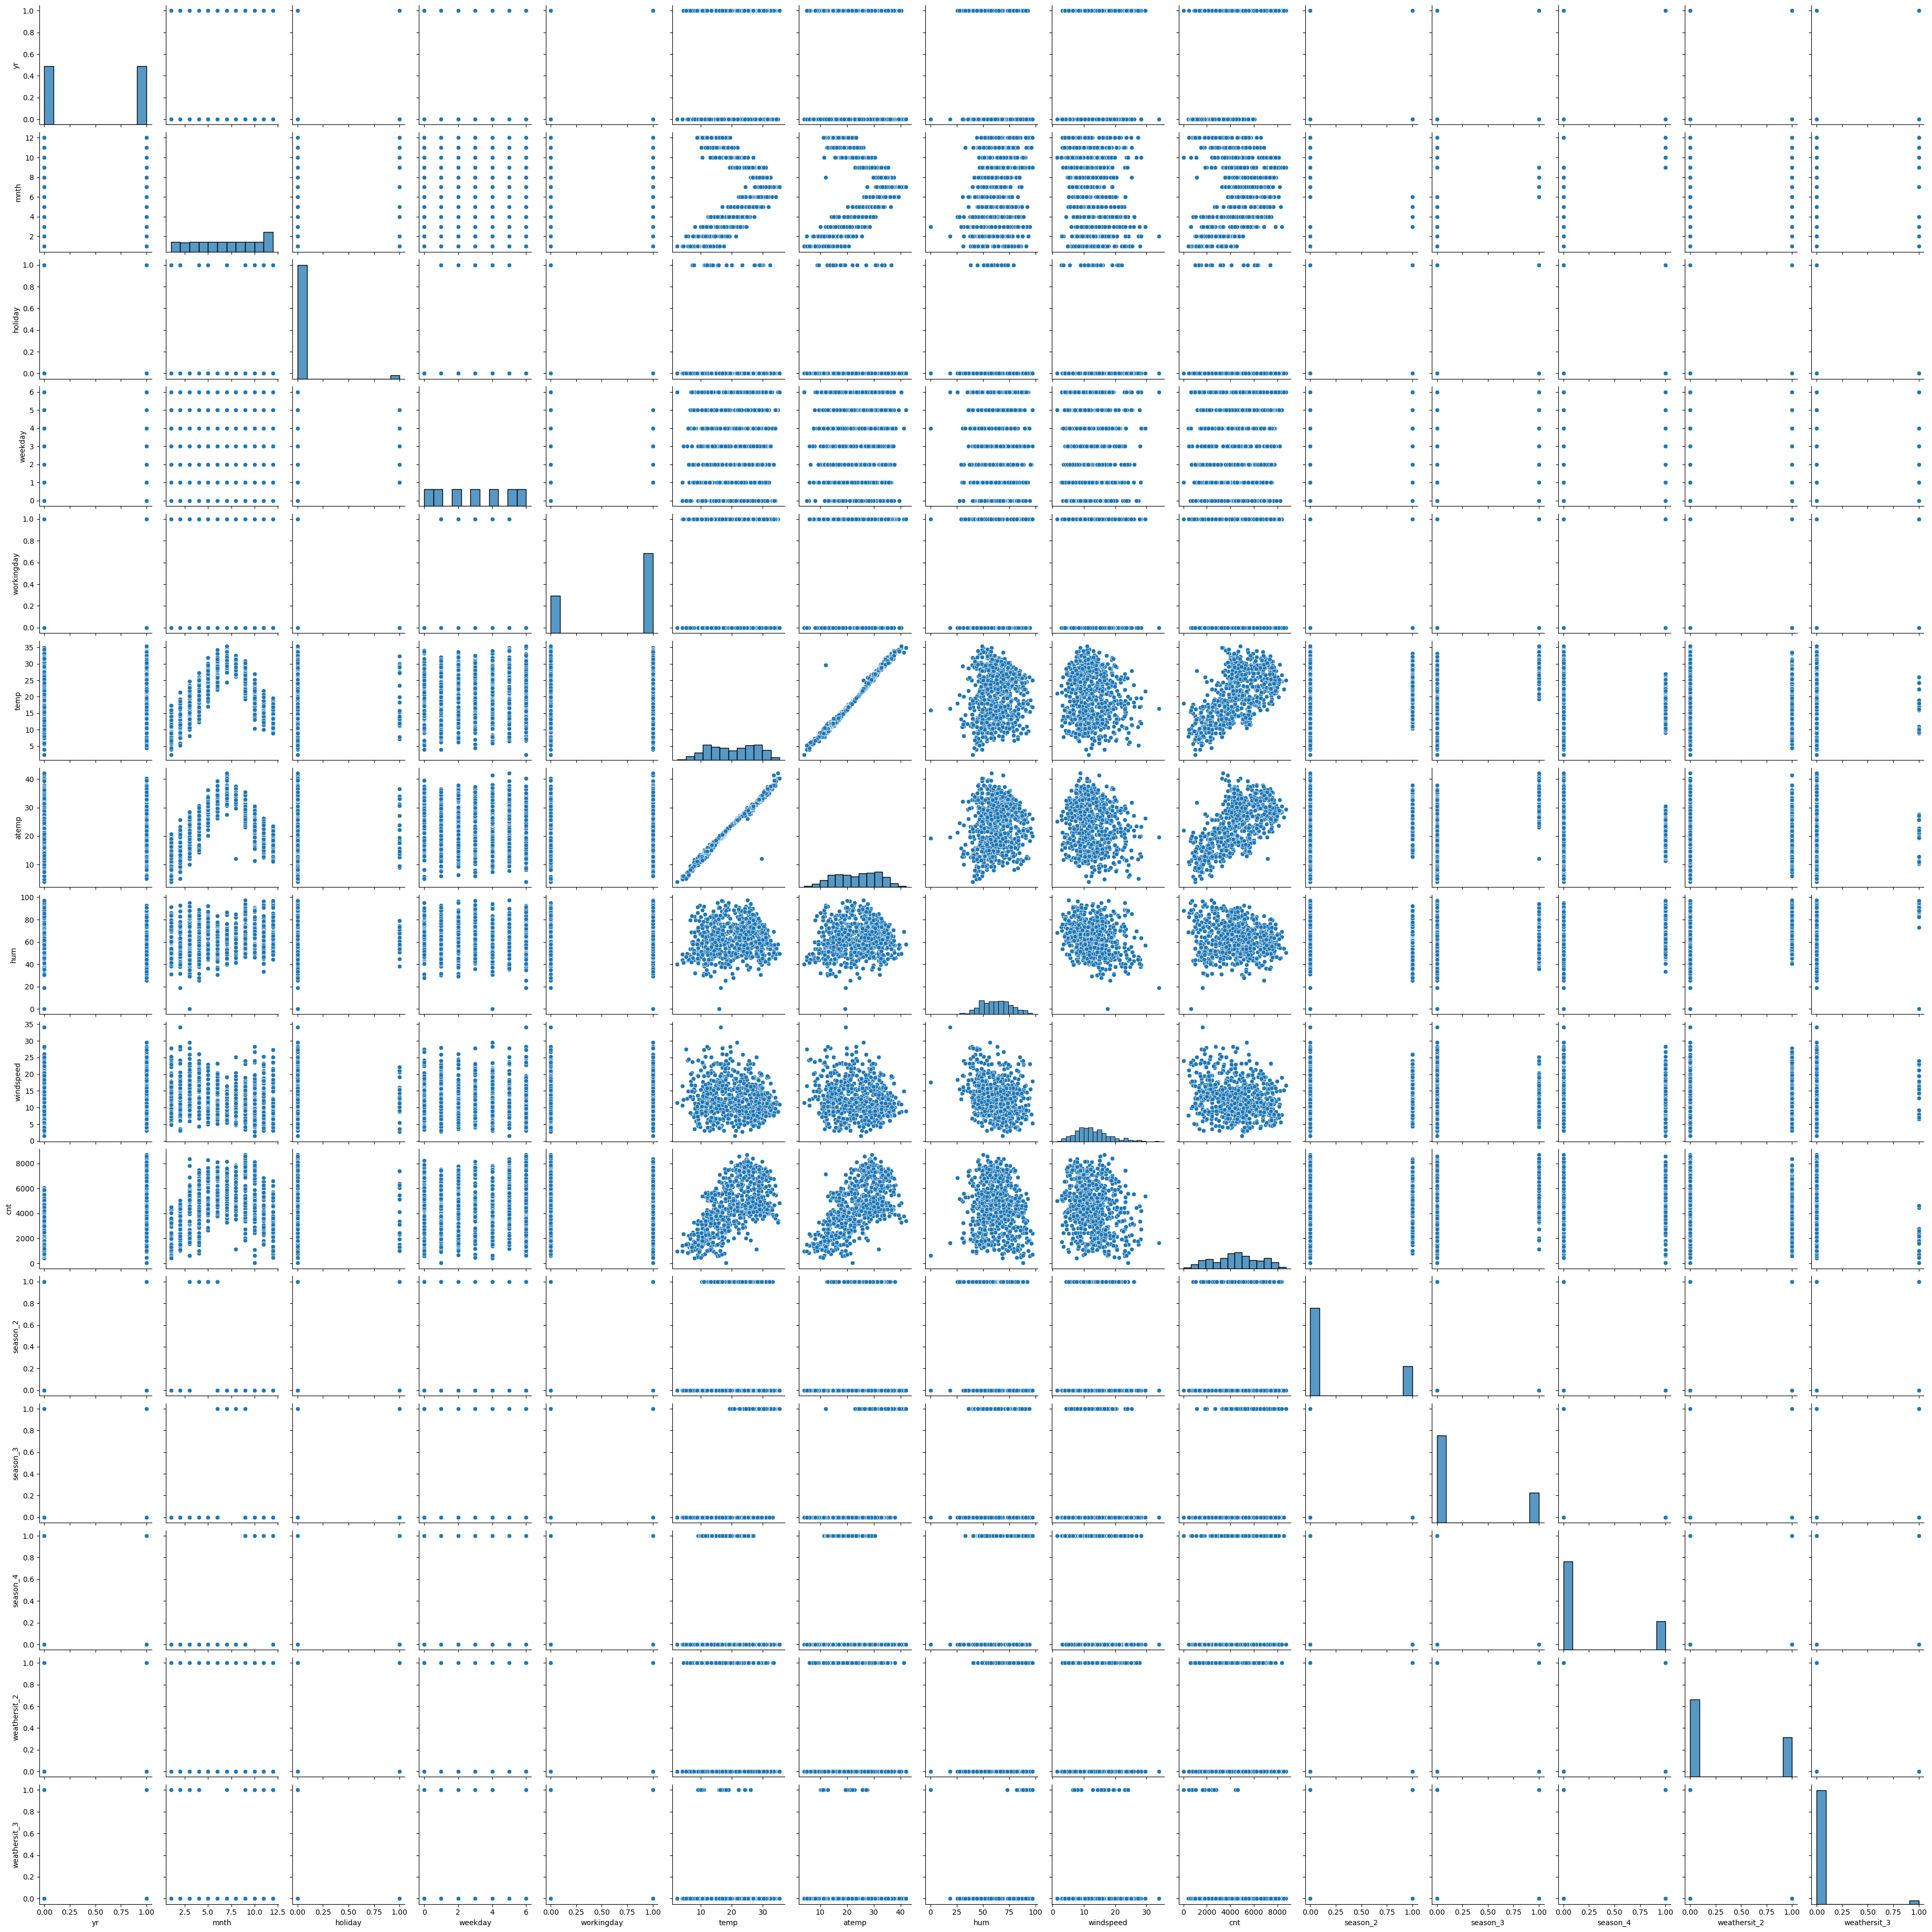

In [1149]:
sns.pairplot(bike_df)
plt.show()

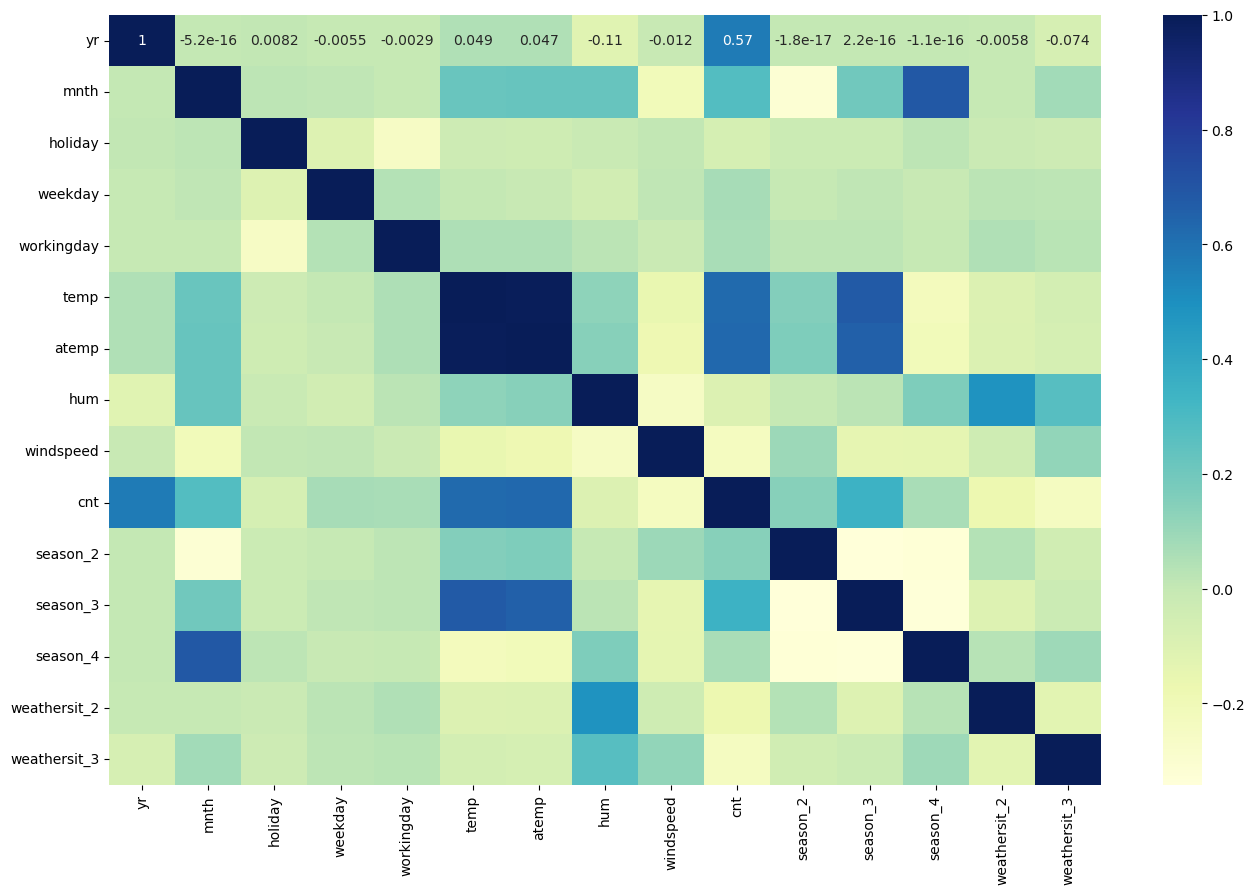

In [1150]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Looking at the heat map of collinearity between features it looks like features like temp, atemp, hum, yr have a high correlation with cnt dependent variable.

---

## Step 6: Building a Linear Model
In this step I'll be building a linear model using the statsmodel library to get the value of R-square and adjusted R-square

In [1154]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const           0.169959
yr              0.232160
mnth            0.012586
holiday        -0.064151
weekday         0.048562
workingday      0.018820
temp            0.435309
atemp           0.060468
hum            -0.126044
windspeed      -0.178078
season_2        0.115841
season_3        0.070159
season_4        0.155594
weathersit_2   -0.058190
weathersit_3   -0.247813
dtype: float64

In [1155]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.69e-182
Time:                        12:02:44   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1700      0.030      5.725      0.000       0.112       0.228
yr               0.2322      0.008     27.708      0.000       0.216       0.249
mnth             0.0126      0.026      0.488      0.626      -0.038       0.063
holiday         -0.0642      0.027     -2.365      0.018      -0.117      -0.011
weekday          0.0486      0.012      3.899      0.000       0.024       0.073
workingday       0.0188      0.009      2.071      0.039       0.001       0.037
temp             0.4353      0.139      3.136      0.002       0.163       0.708
atemp            0.0605      0.142      0.426      0.670      -0.218       0.339
hum             -0.1260      0.039     -3.233      0.001      -0.203      -0.049
windspeed       -0.1781      0.027     -6.590      0.000      -0.231      -0.125
season_2         0.1158      0.016      7.427      0.000       0.085       0.146
season_3         0.0702      0.023      3.043      0.002       0.025       0.115
season_4         0.1556      0.022      7.031      0.000       0.112       0.199
weathersit_2    -0.0582      0.011     -5.339      0.000      -0.080      -0.037
weathersit_3    -0.2478      0.027     -9.082      0.000      -0.301      -0.194
==============================================================================
Omnibus:                       73.742   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.299
Skew:                          -0.732   Prob(JB):                     1.29e-41
Kurtosis:                       5.592   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

## Step 7: Checking VIF and Removing Multicolinearity between independent variables

In [1158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,386.50
6,atemp,364.92
7,hum,17.92
1,mnth,13.87
10,season_3,8.23
11,season_4,7.20
8,windspeed,3.97
9,season_2,3.52
4,workingday,3.14
3,weekday,3.03


In [1159]:
# Considering the high VIF value of temp removing temp
X_train.drop('temp', axis=1,inplace=True)

In [1160]:
# checking the VIF again to see if any other feature has to be removed
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,21.60
6,hum,17.92
1,mnth,13.87
9,season_3,7.60
10,season_4,7.20
7,windspeed,3.80
8,season_2,3.46
4,workingday,3.14
3,weekday,3.03
11,weathersit_2,2.15


In [1161]:
# Considering the high VIF value of atemp removing atemp
X_train.drop('atemp', axis=1,inplace=True)

In [1162]:
# checking the VIF again to see if any other feature has to be removed
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,13.83
5,hum,12.66
9,season_4,7.00
8,season_3,4.17
6,windspeed,3.78
4,workingday,3.13
3,weekday,3.02
7,season_2,2.25
0,yr,1.98
10,weathersit_2,1.98


In [1163]:
# Considering the high VIF value of atemp removing mnth
X_train.drop('mnth', axis=1,inplace=True)

In [1164]:
# checking the VIF again to see if any other feature has to be removed
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,11.64
5,windspeed,3.76
3,workingday,3.13
2,weekday,3.00
7,season_3,2.23
8,season_4,2.18
6,season_2,2.04
0,yr,1.98
9,weathersit_2,1.96
10,weathersit_3,1.13


In [1165]:
# Considering the high VIF value of atemp removing hum
X_train.drop('hum', axis=1,inplace=True)

In [1166]:
# checking the VIF again to see if any other feature has to be removed
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,3.28
3,workingday,2.79
2,weekday,2.76
0,yr,1.93
5,season_2,1.74
6,season_3,1.71
7,season_4,1.64
8,weathersit_2,1.51
9,weathersit_3,1.08
1,holiday,1.06


---

## Step 8: Building a New Linear Model with Remaining Features

In [1169]:
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     160.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.20e-149
Time:                        12:02:45   Log-Likelihood:                 405.95
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     499   BIC:                            -743.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2443      0.019     12.582      0.000       0.206       0.282
yr               0.2478      0.010     25.226      0.000       0.228       0.267
holiday         -0.0687      0.032     -2.134      0.033      -0.132      -0.005
weekday          0.0505      0.015      3.438      0.001       0.022       0.079
workingday       0.0209      0.011      1.939      0.053      -0.000       0.042
windspeed       -0.1758      0.030     -5.848      0.000      -0.235      -0.117
season_2         0.2549      0.014     18.135      0.000       0.227       0.283
season_3         0.3128      0.014     22.009      0.000       0.285       0.341
season_4         0.2294      0.014     16.097      0.000       0.201       0.257
weathersit_2    -0.0897      0.010     -8.582      0.000      -0.110      -0.069
weathersit_3    -0.2958      0.030     -9.986      0.000      -0.354      -0.238
==============================================================================
Omnibus:                       28.854   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.536
Skew:                          -0.324   Prob(JB):                     1.18e-13
Kurtosis:                       4.543   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1170]:
# Considering the high p value of holiday and workingday columns I'll remove these columns from the train set
X_train.drop(['workingday','holiday'], axis=1,inplace=True)

X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.24e-149
Time:                        12:02:45   Log-Likelihood:                 400.51
No. Observations:                 510   AIC:                            -783.0
Df Residuals:                     501   BIC:                            -744.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2537      0.018     14.189      0.000       0.219       0.289
yr               0.2488      0.010     25.121      0.000       0.229       0.268
weekday          0.0533      0.015      3.615      0.000       0.024       0.082
windspeed       -0.1795      0.030     -5.925      0.000      -0.239      -0.120
season_2         0.2585      0.014     18.284      0.000       0.231       0.286
season_3         0.3157      0.014     22.061      0.000       0.288       0.344
season_4         0.2287      0.014     15.913      0.000       0.200       0.257
weathersit_2    -0.0878      0.011     -8.340      0.000      -0.108      -0.067
weathersit_3    -0.2909      0.030     -9.749      0.000      -0.350      -0.232
==============================================================================
Omnibus:                       39.591   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.851
Skew:                          -0.445   Prob(JB):                     6.19e-19
Kurtosis:                       4.776   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1171]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.03
1,weekday,2.69
0,yr,1.89
3,season_2,1.66
4,season_3,1.58
5,season_4,1.57
6,weathersit_2,1.49
7,weathersit_3,1.08


#### So the adjusted R-square for the model on training data comes out to be 0.754

---

## Step 9: Residual Analsyis of the Training Data

In [1175]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

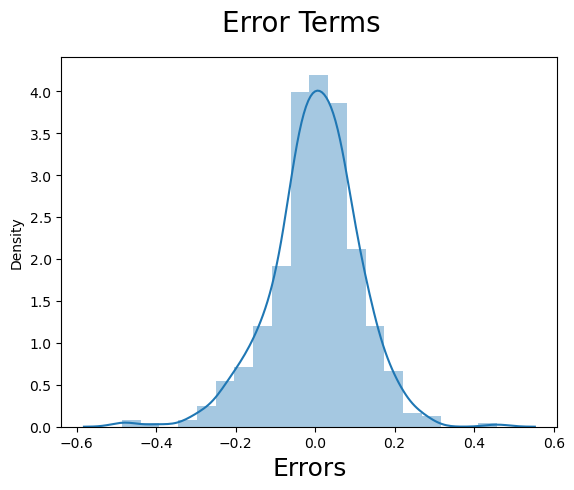

In [1176]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Looking at the histogram we can see that the error follows a normal distribution with mean of 0**

---

## Step 10: Making Predictions Using the Final Model

In [1180]:
num_vars = ['weekday', 'mnth', 'temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.319635,0.027397
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [1181]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1182]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m3 = X_test_m3.drop(['temp','atemp','mnth','hum','workingday','holiday'], axis = 1)

# Making predictions using the third model
y_pred_m3 = lr_3.predict(X_test_m3)

---

## Step 11: Model Evaluation

Text(0, 0.5, 'y_pred')

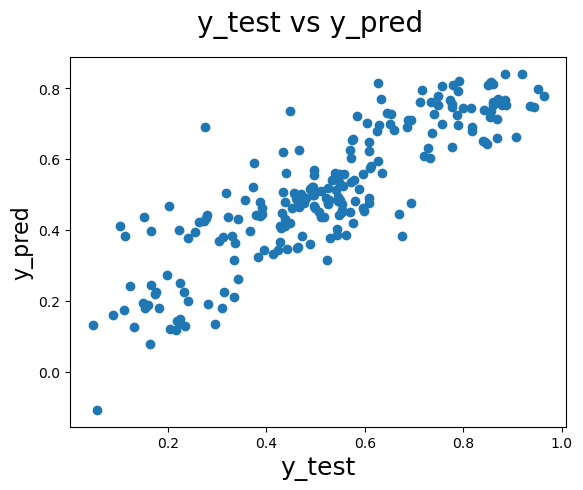

In [1185]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### Checking R2 of Test Data Set

In [1187]:
# Checking the r2 score for test data set
r2_score(y_test, y_pred_m3)

0.7413078218939027

#### Adjusted R-square for the model on training data is 0.754

#### R2 score for the test data set is 0.74 and hence we can say that the model is predicting the value of cnt featrure on test data with almost the same accuracy as the training data.